In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
import sys
sys.path.append('/home/chenani/ownCloud/Workspaces/Eclipse/dataAnalysis/Sleep-current/src/')

In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import pandas as pd
from scipy.misc import comb
import scipy as scp
import numpy as np
import matplotlib.pyplot as pl
import pickle as pkl
import sets
import random
import itertools
import os,sys,fnmatch
import timeit
import scipy.stats
import seaborn as sns
from IPython.core.display import display, HTML
from scipy.stats import chisquare
sns.set_style("white",{ 'legend.frameon': False})


/home/chenani/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: DeprecationWarning: the sets module is deprecated
/home/chenani/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [4]:
def locate(pattern, root=os.curdir):
    '''Locate all files matching supplied filename pattern in and below
        supplied root directory.
    '''
    for path, dirs, files in os.walk(os.path.abspath(root)):
        for filename in fnmatch.filter(files, pattern):
            yield [path,filename]
clrs = ["#cb535a",
"#5ba952",
"#c97d3d",
"#9a993e"]

In [5]:
popDBList = [os.path.join(item[0],item[1])for item in locate('*All*','/home/chenani/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/')]
popDBList

['/home/chenani/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/control/Rat614Control/dataFiles/614D3All.ro',
 '/home/chenani/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/control/Rat614Control/dataFiles/614D2All.ro',
 '/home/chenani/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/control/Rat3661Control/dataFiles/3661D2All.ro',
 '/home/chenani/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/control/Rat3906Control/dataFiles/rankOrder/3906D3All.ro',
 '/home/chenani/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/control/Rat3906Control/dataFiles/rankOrder/3906D1All.ro',
 '/home/chenani/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/control/Rat3906Control/dataFiles/rankOrder/3906D2All.ro',
 '/home/chenani/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/control/Rat3906Control/dataFiles/rankOrder/3906D4All.ro',
 '/home/chenani/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/control/Rat616Control/dataFiles/616D1All.ro',
 '/home/chenani/ownCloud/IpythonNotebooks/Slee

In [39]:
LTcorrs = np.array([])
for item in popDBList:
    if item.find('lesion')>0:
        print item
        popDB= pd.read_pickle(item)
        LTcorrs = np.append(LTcorrs,popDB)
LTcorrs = LTcorrs.flatten()

/home/chenani/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/lesion/Rat3837Lesion/dataFiles/3837D1All.lro
/home/chenani/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/lesion/Rat3837Lesion/dataFiles/3837D3All.lro
/home/chenani/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/lesion/Rat434Lesion/dataFiles/434D1All.lro
/home/chenani/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/lesion/Rat3838Lesion/dataFiles/3838D2All.lro
/home/chenani/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/lesion/Rat3838Lesion/dataFiles/3838D4All.lro
/home/chenani/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/lesion/Rat3656Lesion/dataFiles/3656D1All.lro
/home/chenani/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/lesion/Rat405Lesion/dataFiles/405D1All.lro


In [40]:
corrBins = np.arange(-1.05,1.03,0.09)

In [41]:
crr92 = pkl.load(open('corr9.crr2','rb'))

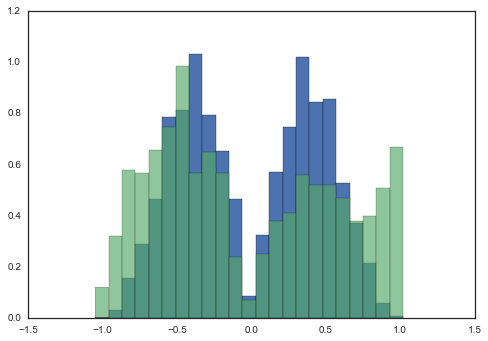

In [42]:
hstSorr = pl.hist(crr92,corrBins,normed=True)
hstLT = pl.hist(LTcorrs,corrBins,normed=True,alpha=0.65)
cumhstSorr = np.cumsum(hstSorr[0])
cumhstLT = np.cumsum(hstLT[0])

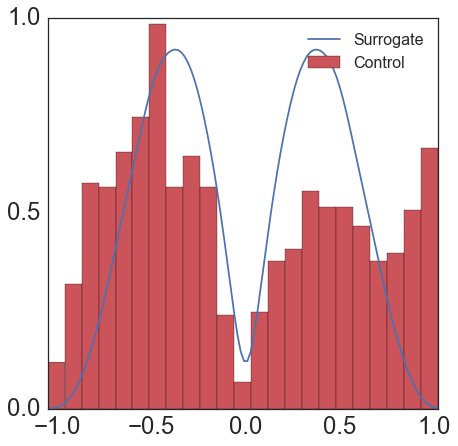

In [43]:
f,ax = pl.subplots(1,1,figsize=[7,7])
sns.kdeplot(crr92,label='Surrogate')
n, bins, patches = pl.hist(LTcorrs,corrBins, normed=1,histtype='bar',
                           stacked=False,fill=True,
                           label=['Control'],
                           color = [clrs[0]])
pl.legend(fontsize=16)
pl.yticks([0,0.5,1],fontsize=24)
pl.xticks([-1,-0.5,0,0.5,1],fontsize=24)
pl.xlim(-1.05,1.02);


In [44]:
#f.savefig('/home/chenani/ownCloud/Plots/SFN-poster/RO-plots/3906-RUN.svg',transparent=True)
#f.savefig('/home/chenani/ownCloud/Plots/SFN-poster/RO-plots/3906-RUN.pdf',transparent=True)
#f.savefig('/home/chenani/ownCloud/Plots/SFN-poster/RO-plots/3906-RUN.eps',transparent=True)

[]

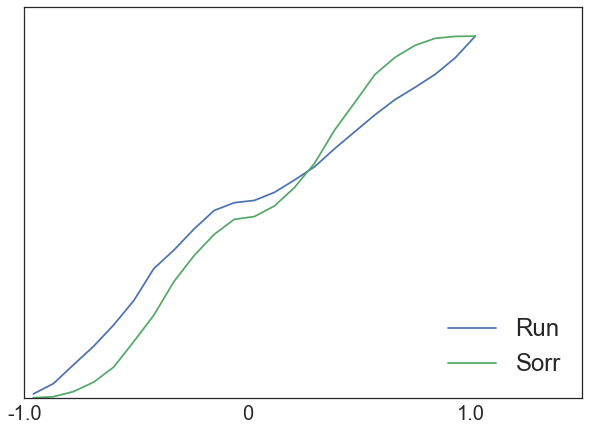

In [45]:
f,ax = pl.subplots(1,1,figsize=[10,7],sharey=False)
ax.plot(corrBins[1:],cumhstLT,label = 'Run')
ax.plot(corrBins[1:],cumhstSorr,label = 'Sorr')
#ax.plot(bins[1:],bcdf,label='Cnt')
#ax.plot(bins[1:],ccdf,label ='Lsn')
ax.legend(loc=4,fontsize=24)
ax.set_xticks([-1.0,0,1.0])
ax.set_xticklabels([-1.0,0,1.0],fontsize=20)
ax.set_yticks([])


In [46]:
SorrProbs = hstSorr[0]*0.09
LTProbs = hstLT[0]*0.09

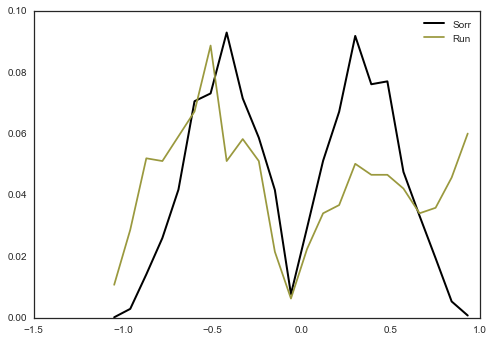

In [47]:
pl.plot(corrBins[:-1],SorrProbs,c='k',lw=2,label='Sorr')
pl.plot(corrBins[:-1],LTProbs,c=clrs[3],label ='Run')
pl.legend()

In [68]:
nSigP  = np.histogram(LTcorrs,corrBins)[0][20:].sum()
nSigN  = np.histogram(LTcorrs,corrBins)[0][:3].sum()
Nreac = np.histogram(LTcorrs,corrBins)[0].sum()
print 100.0*nSigP/Nreac,100.0*nSigN/Nreac

14.1577060932 9.13978494624


In [71]:
corrBins[:3]

array([-1.05, -0.96, -0.87])

In [50]:
LTProbs[20:]/SorrProbs[20:]

array([  1.84593409,   8.58345021,  80.09487666])

In [96]:
chisquare(hstLT[0][10:14],hstSorr[0][10:14])

Power_divergenceResult(statistic=0.69395742418611583, pvalue=0.87462429547256271)

In [82]:
corrBins[10:14]

array([-0.15, -0.06,  0.03,  0.12])